# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the Materials and Methods section of the UCI paper, the data represents 17 marketing compaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [38]:
# Check data types and missing values
print(df.dtypes)
print(df.isnull().sum())

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [39]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Check frequency of unique values in object columns
for col in object_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("="*30)

Column: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
Column: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
Column: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
Column: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
Column: housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64
Column: loan
loan
no         33950
yes         6248
unknown      990
Nam

#### Features with Missing Values:
There is no missing values in the features. However, it is common for missing values to be represented by 'unknown' or other placeholders. In order to find that out, I counted the number of each unique value in all object columns.
The number of "unknown" values in the columns are:
- job: 330
- marital: 80
- education: 1731
- default: 8597
- housing: 990
- loan: 990


#### Features to be Coerced to a Different Data Type:
age: It is mentioned as numeric, so we need to ensure it is in integer or float format.
duration: It is mentioned as numeric and should be in integer format.
campaign, pdays, previous: These are also mentioned as numeric and should be in integer format.
emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed: These are mentioned as numeric, and they should remain as float.

1. job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome: These are categorical features represented as objects. For modeling purposes, these could be converted to categorical data type or one-hot encoded.

2. duration, campaign, pdays, previous: These are numeric features but represented as integers. They are correctly typed and do not need any coercion.

Let's proceed with encoding the categorical features:


In [40]:
# Coerce categorical features to 'category' data type
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check data types again
print(df.dtypes)

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                   object
dtype: object


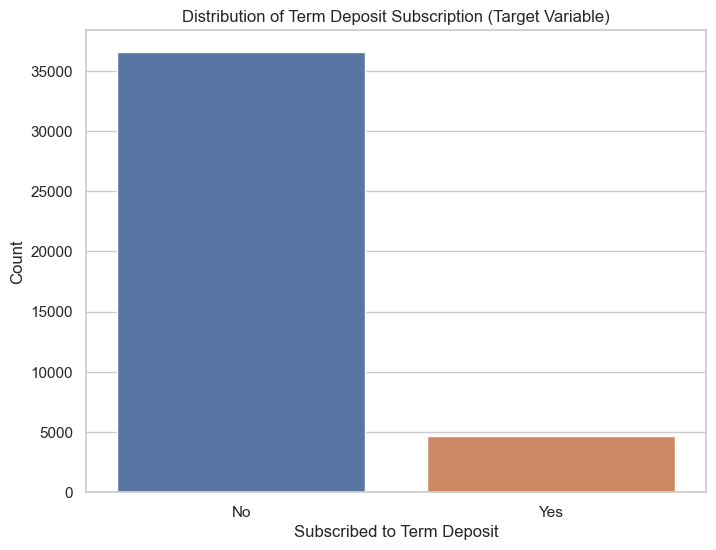

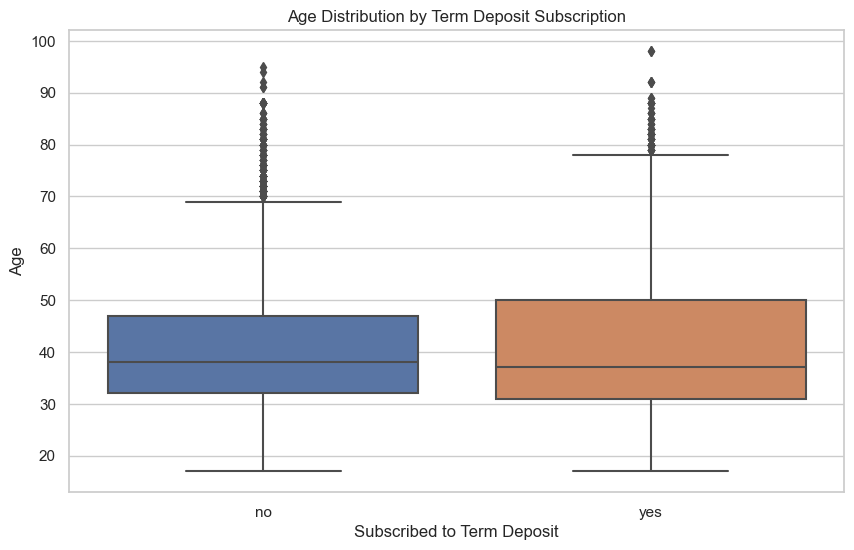

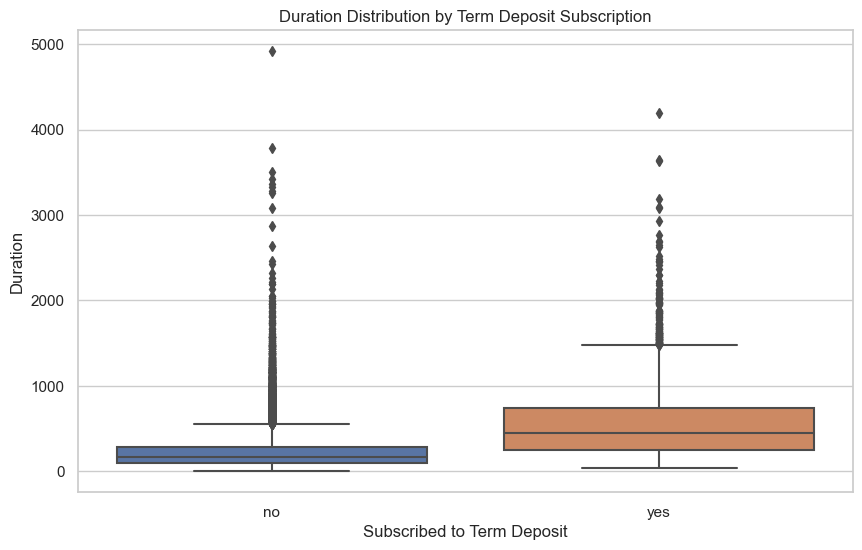

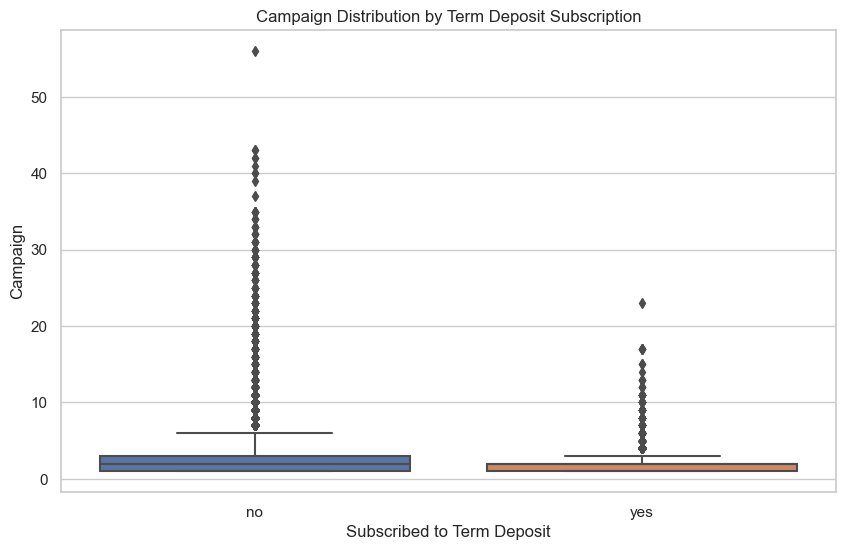

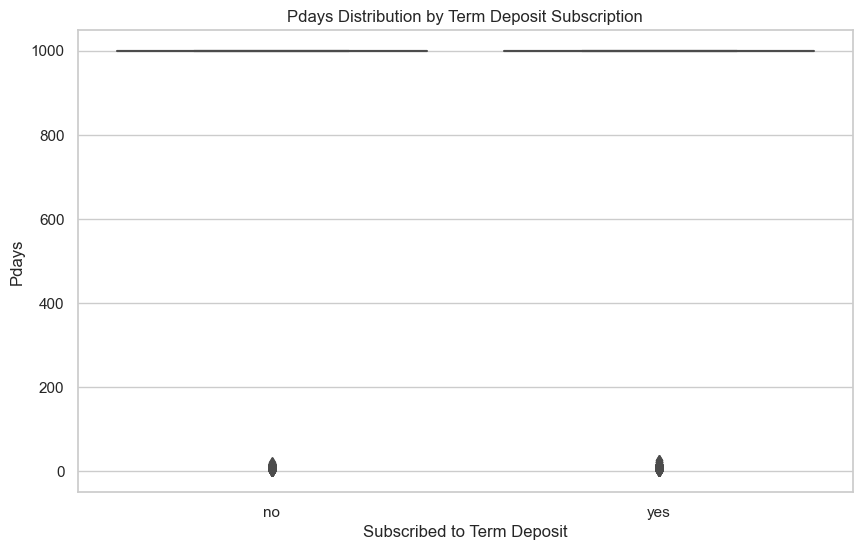

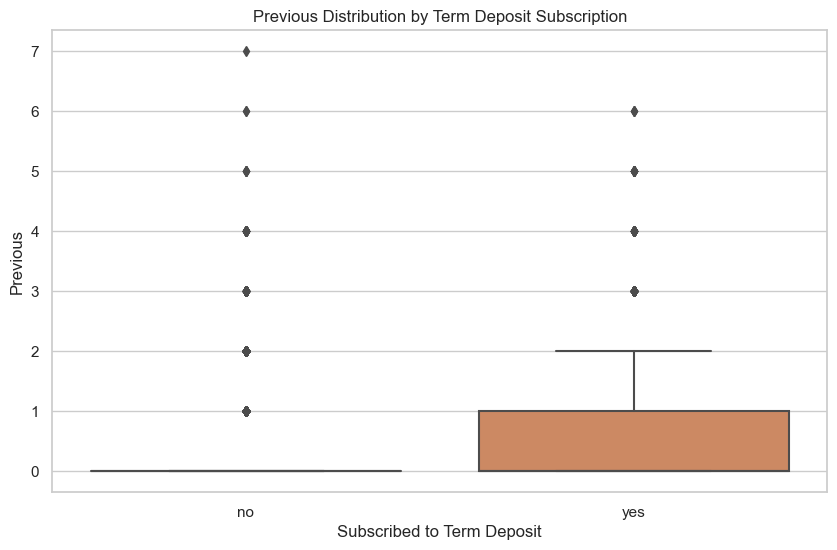

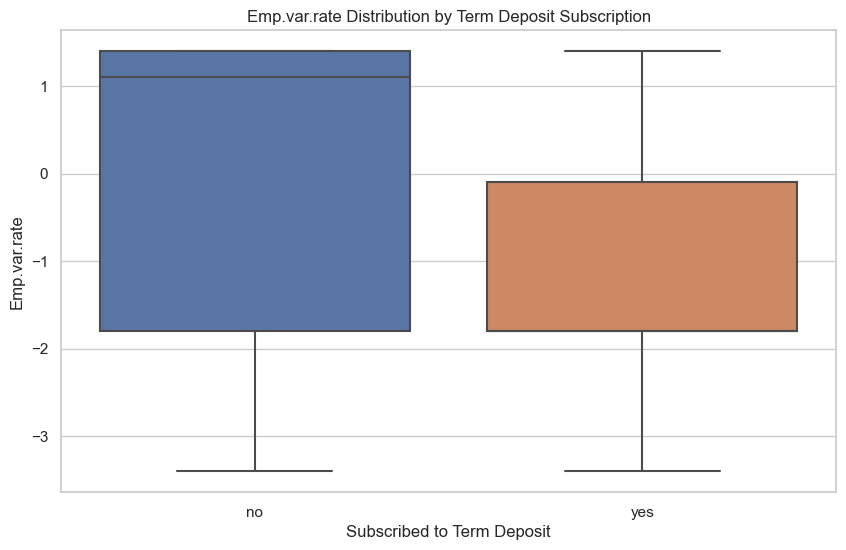

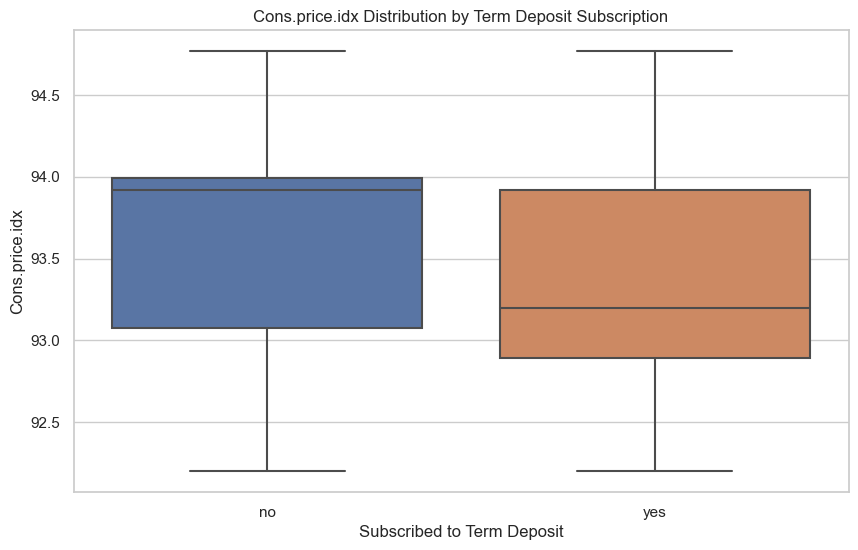

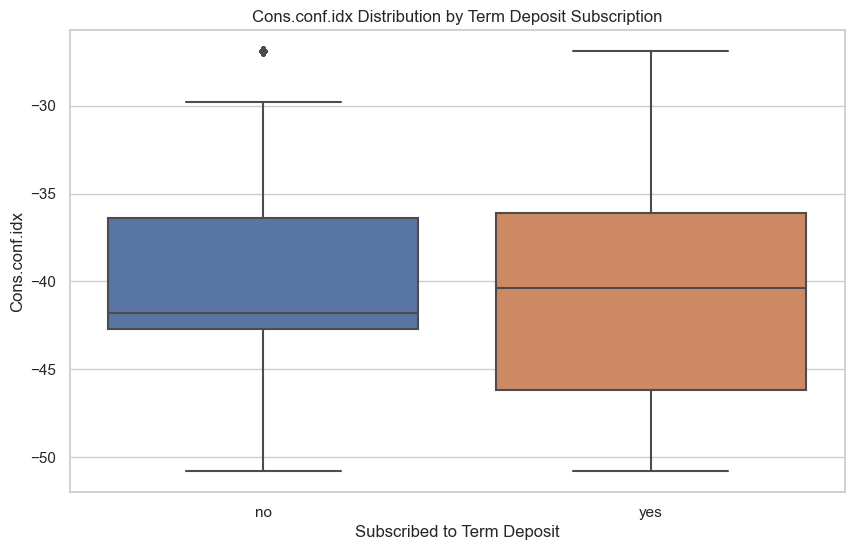

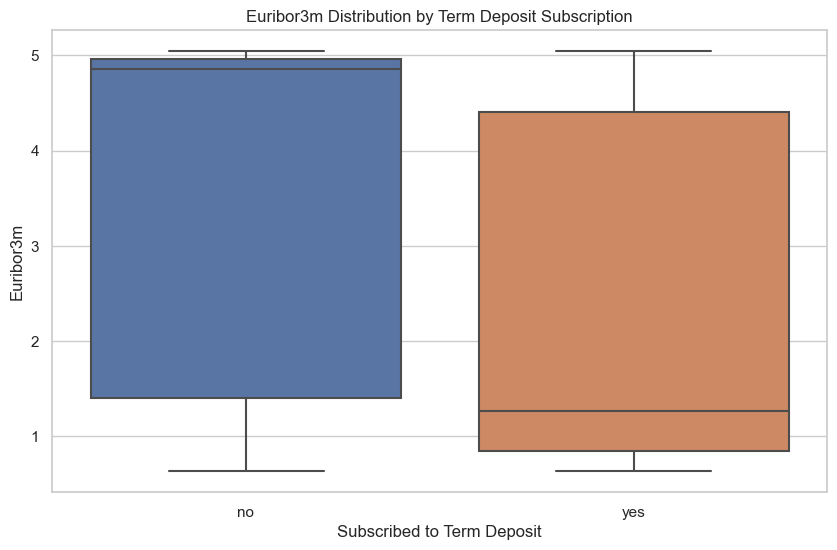

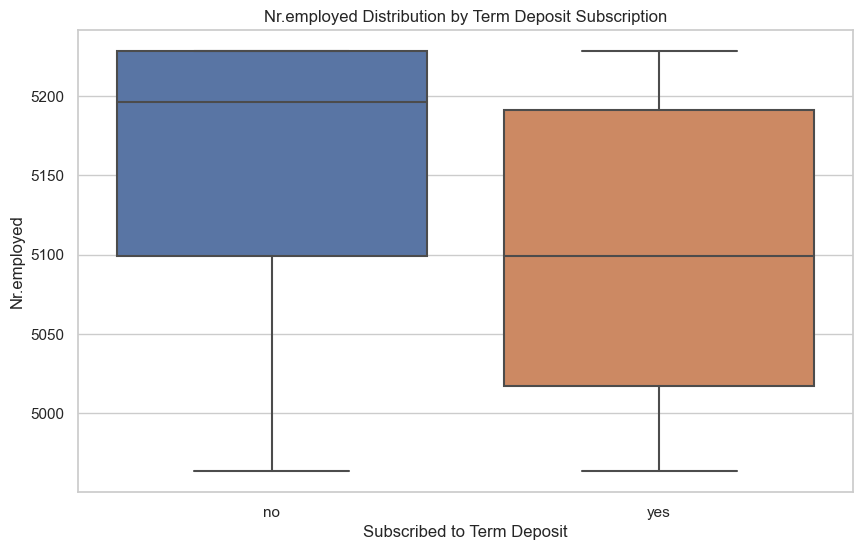

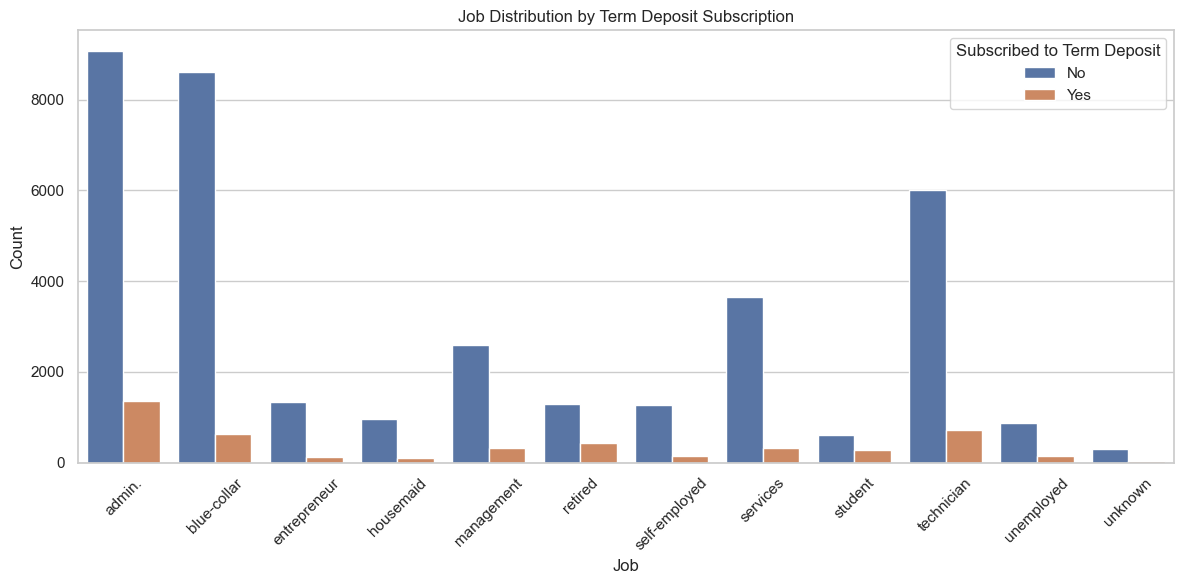

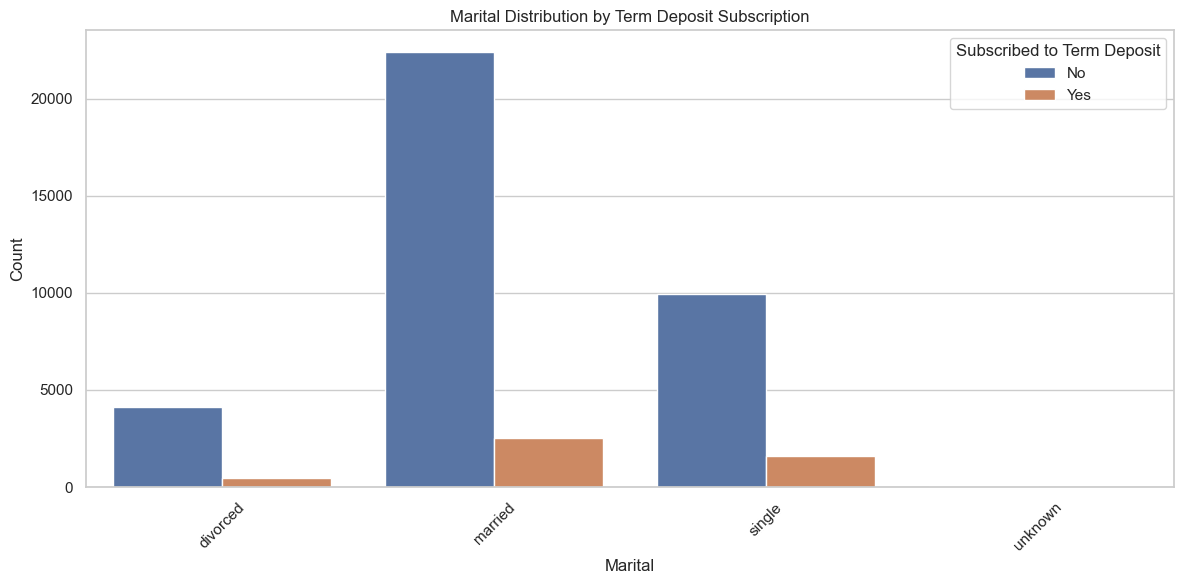

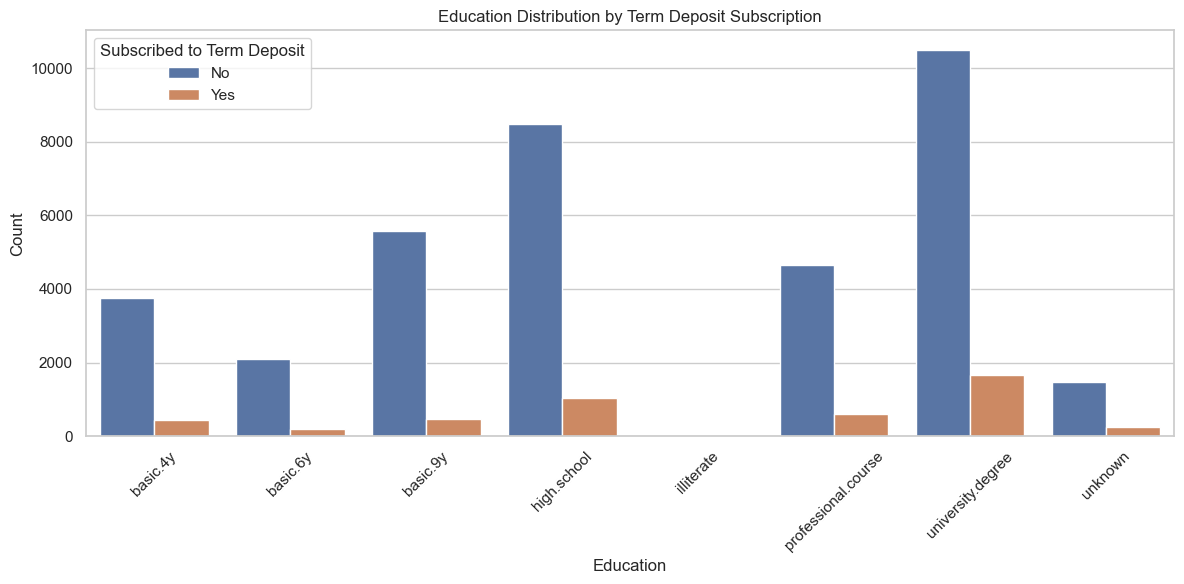

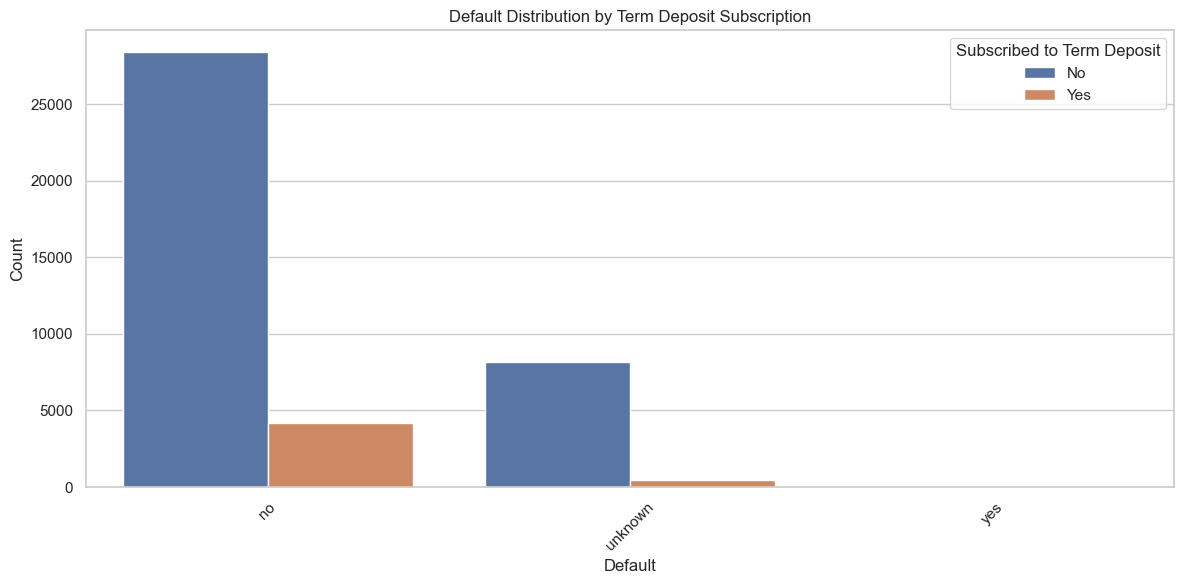

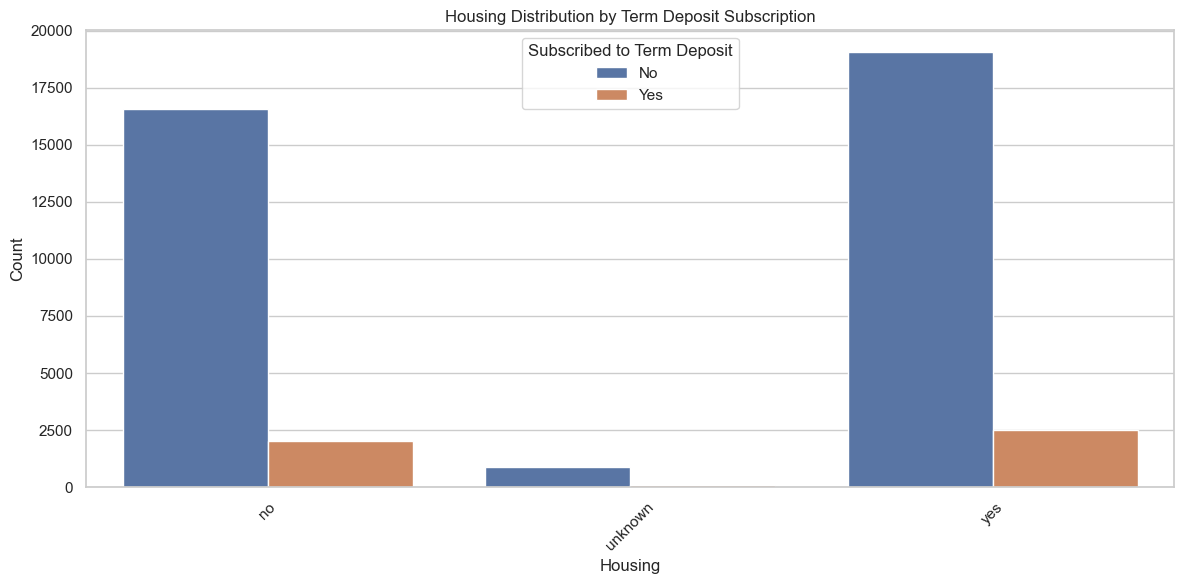

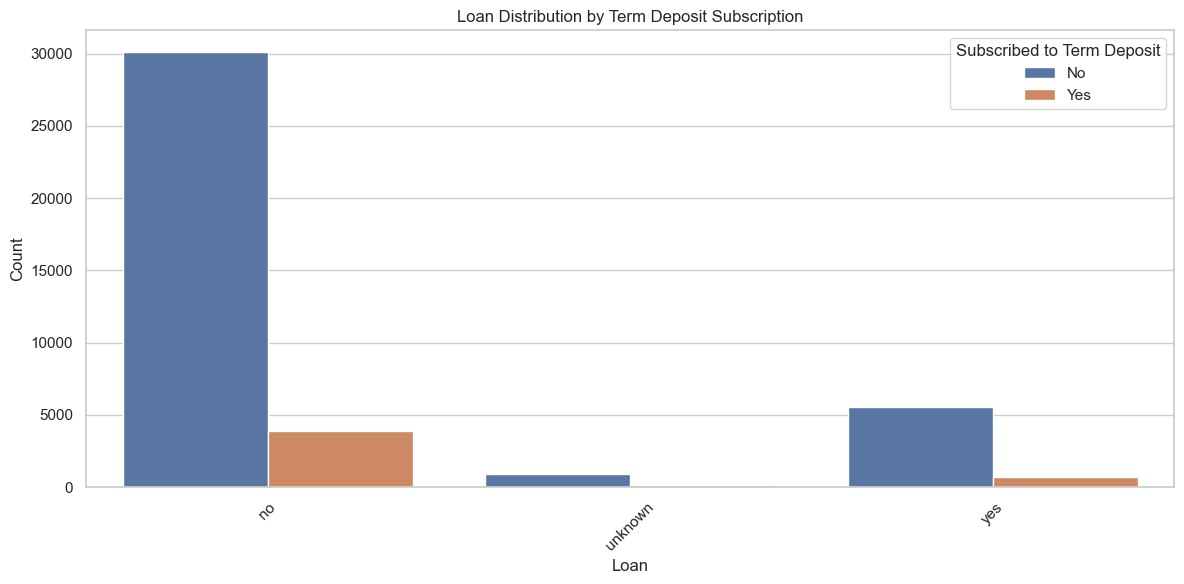

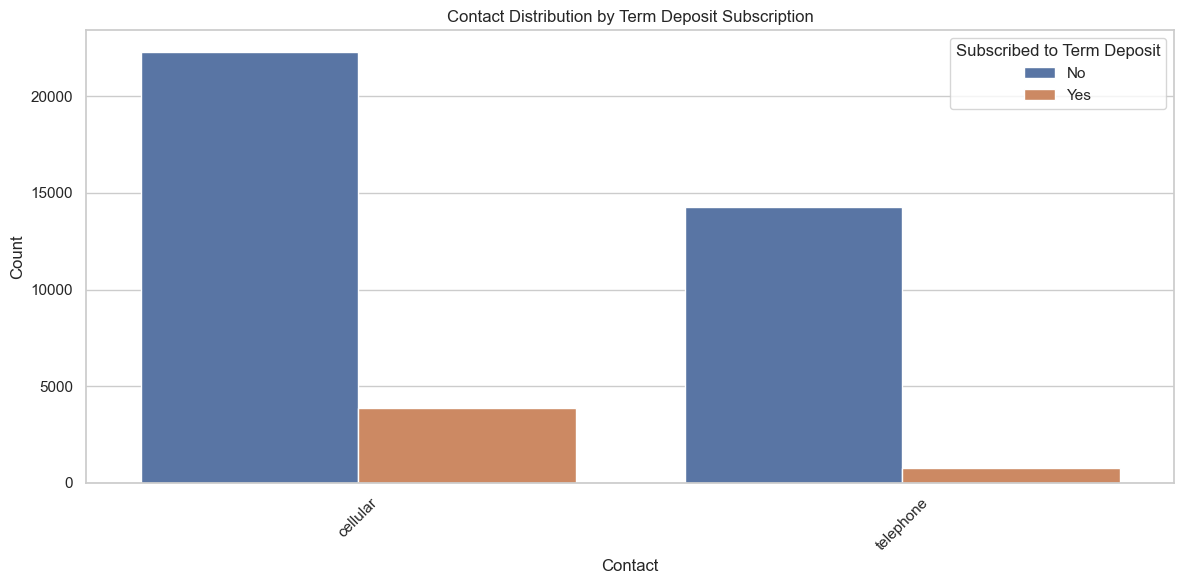

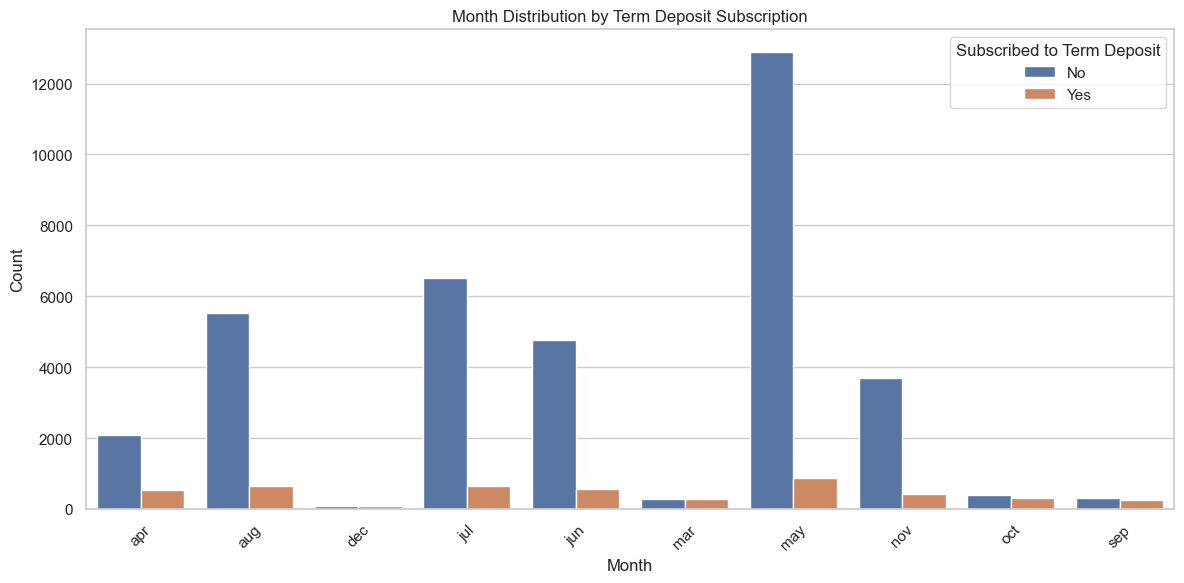

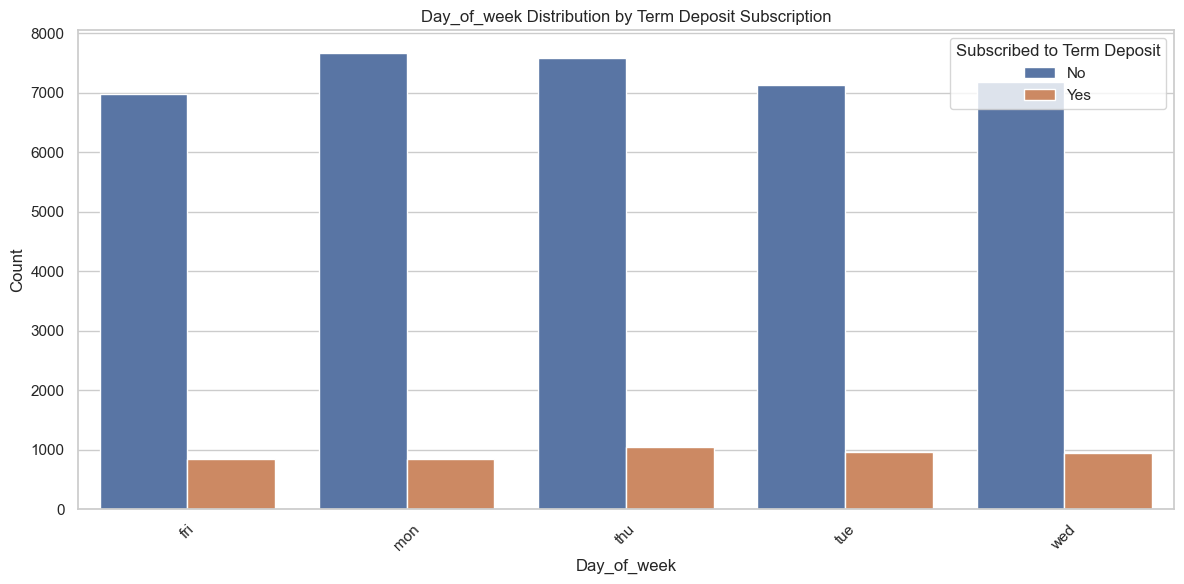

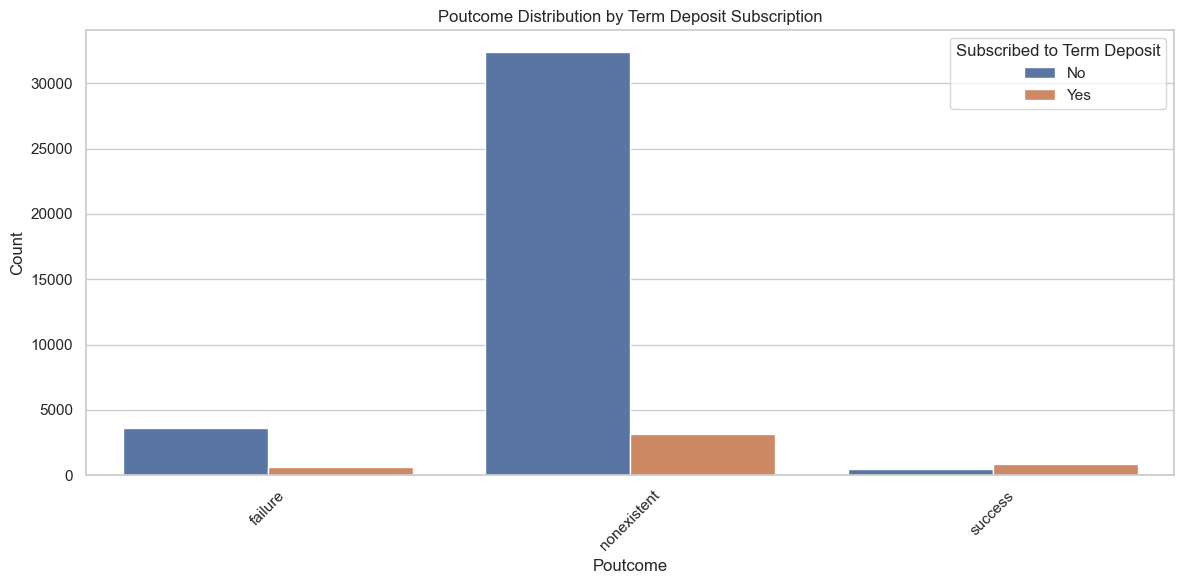

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Distribution of Term Deposit Subscription (Target Variable)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Visualize the distribution of continuous variables against the target variable
continuous_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                   'euribor3m', 'nr.employed']

for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f'{col.capitalize()} Distribution by Term Deposit Subscription')
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel(col.capitalize())
    plt.show()

# Visualize the distribution of categorical variables against the target variable
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'{col.capitalize()} Distribution by Term Deposit Subscription')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Subscribed to Term Deposit', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

#### Business Objective:
The business objective of this task is to predict whether a client will subscribe to a term deposit based on various features related to the client's demographic, economic, and past marketing campaign interactions. This prediction can assist the marketing team of the bank in targeting potential clients more effectively, thereby improving the efficiency and success rate of their marketing campaigns.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

I will use the following methods: 
1. Encode categorical features using one-hot encoding.
2. Encode the target column to numerical values.

In [42]:
# Select bank information features and target column
bank_data = df[categorical_cols]  # Categorial variables
target = df['y']  # Target column

# Display the columns of bank_data
print(bank_data.columns)

# One-hot encode categorical features
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_cols)

# Encode target column to numerical values
target_encoded = target.map({'no': 0, 'yes': 1})

# Display the first few rows of the encoded data
print(bank_data_encoded.head())
print(target_encoded.head())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0       False            False             False           True   
1       False            False             False          False   
2       False            False             False          False   
3        True            False             False          False   
4       False            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2           False        False              False          True        False   
3           False        False              False         False        False   
4           False        False              False   

In [43]:
# Select numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Select numerical data
numerical_data = df[numerical_cols]

# Combine numerical and encoded categorical data
X = pd.concat([bank_data_encoded, numerical_data], axis=1)

# Display the shape of the combined dataset
print("Shape of X:", X.shape)

Shape of X: (41188, 63)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target_encoded, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32950, 63)
Shape of X_test: (8238, 63)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?


A baseline model provides a benchmark against which you can compare the performance of more complex models. A common baseline for classification tasks is to predict the most frequent class in the training set for all instances in the test set.

Since you are dealing with a binary classification problem where the target variable 'y' indicates whether a client has subscribed to a term deposit ('yes' or 'no'), the baseline accuracy can be calculated as the percentage of the majority class in the training set.

In [45]:
# Calculate the baseline accuracy
baseline_accuracy = y_train.value_counts(normalize=True).max()

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8876


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = logreg.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9103


### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:

# Predict on the test set
y_test_pred = logreg.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9109


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Initialize lists to store results
results = {'Model': [], 'Train Time (s)': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Fit and score models
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train_scaled, y_train)  # Fit the model
    fit_time = time.time() - start_time  # Calculate fit time
    
    # Predict on train set
    y_train_pred = model.predict(X_train_scaled)
    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results['Model'].append(model_name)
    results['Train Time (s)'].append(fit_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Create DataFrame from results
results_df = pd.DataFrame(results)


In [49]:
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.245391,0.911684,0.911508
1,KNN,0.013021,0.919879,0.898155
2,Decision Tree,0.152483,1.000000,0.887473
3,SVM,10.101926,0.928134,0.909080


Logistic Regression has the highest test accuracy among four models. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### 1. Feature Engineering and Exploration
- Feature Scaling: Many machine learning algorithms perform better when numerical features are on a similar scale. 
- Feature Interaction: Sometimes, the combination of two or more features can be more predictive than the individual features themselves. For example, you could create an interaction feature between age and euribor3m or age and cons.price.idx.
- Binning or Bucketing: We can convert continuous features into categorical features by binning them into discrete intervals. For example, age groups, duration buckets, etc.
- Correlation Analysis: Check the correlation between numerical features. Highly correlated features can sometimes be redundant, and removing them might improve the model's performance.

#### 2. Hyperparameter Tuning and Grid Search
Hyperparameter tuning is crucial for optimizing the performance of machine learning models. For this task, we can use Grid Search Cross Validation, which tries out different combinations of hyperparameters to find the best one.

#### 3. Adjust Performance Metric
Accuracy is a good metric for classification tasks, but it might not always be the best metric, especially if the dataset is imbalanced. Other metrics like precision, recall, and F1-score can provide a more comprehensive view of the model's performance.

To improve the model, I will first check the correlation between numerical features. Then I will remove highly correlated and redundant features.

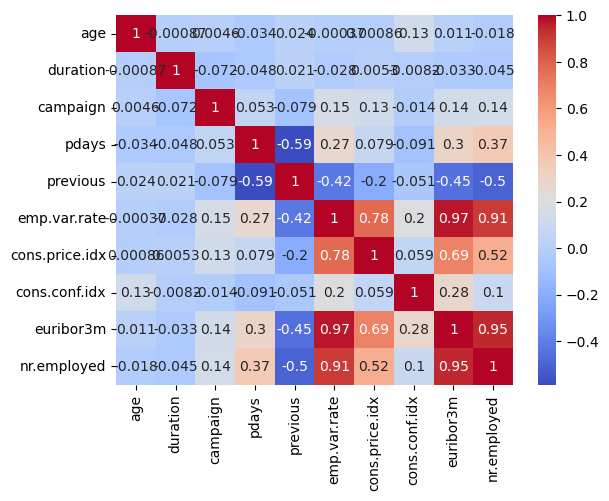

In [33]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

There are features that are highly correlated:
- euribor3m & emp.var.rate: 0.97
- eruibor3m & nr.employed: 0.95
- nr.employed & emp.var.rate: 0.91

The meanings of these variables are:
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- euribor3m: euribor (the Euro Interbank Offered Rate) 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Since interest rate is an economic indicator that is closely correlated with employment rate, we can leave the interest rate and drop two other variables. 

In [51]:
# Drop emp.var.rate and nr.employed columns from X
X = X.drop(['emp.var.rate', 'nr.employed'], axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target_encoded, test_size=0.2, random_state=42)

As a second method to improve the model, I will standardize numerical variables. 

In [52]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Initialize lists to store results
results = {'Model': [], 'Train Time (s)': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Fit and score models
for model_name, model in models.items():
    start_time = time.time()  # Start time
    model.fit(X_train_scaled, y_train)  # Fit the model
    fit_time = time.time() - start_time  # Calculate fit time
    
    # Predict on train set
    y_train_pred = model.predict(X_train_scaled)
    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results['Model'].append(model_name)
    results['Train Time (s)'].append(fit_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Create DataFrame from results
results_df = pd.DataFrame(results)

results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.123933,0.910895,0.911386
1,KNN,0.003411,0.918331,0.897548
2,Decision Tree,0.146988,1.000000,0.888080
3,SVM,10.151849,0.927375,0.909080


Test accuracy slightly improved for two models: Logistic Regression, KNN

### Findings

1. Logistic Regression performed the best among the tested models with an accuracy of 91.09% on the test set.
2. Decision Tree showed signs of overfitting as it achieved 100% accuracy on the training set but only 88.75% on the test set.
3. KNN and SVM also performed reasonably well but had longer training times compared to other models.
4. Feature Correlation: The features 'euribor3m', 'emp.var.rate', and 'nr.employed' showed high correlation. We dropped 'emp.var.rate' and 'nr.employed' to reduce multicollinearity.
5. Standardization: Standardized numerical variables improved the model's performance marginally.

### Recommendations and Next Steps
1. Feature Engineering: Continue exploring interactions between features, especially between demographic and economic indicators.
2. Hyperparameter Tuning: Perform Grid Search to optimize the hyperparameters of each model for better performance.
3. Evaluation Metrics: Given the class imbalance in the target variable, consider using metrics like precision, recall, and F1-score for a more comprehensive performance assessment.
4. Further Analysis: Investigate other potential features or external datasets that might improve the predictive power of the model.
5. Deployment and Monitoring: Once satisfied with the model's performance, deploy it in a real-world environment and continuously monitor its performance for any degradation over time.

By implementing these recommendations, we can potentially develop a more robust and accurate predictive model to assist the bank's marketing team in their campaign strategies.